In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()
fig = plt.figure(figsize = (10,6))
df=pd.read_csv("crosssection_AAPL.csv")
df.head()

,Date1,Time1,Year,Month,Day,Hour,Minute,SYMBOL,BID,OFR,N_OFFER,N_BID
0,20130102,09:30,2013,1,2,9,30,AAPL,553.45,553.63,6953.0,10359.0
1,20130102,09:31,2013,1,2,9,31,AAPL,530.64,552.42,11562.0,11163.0
2,20130102,09:32,2013,1,2,9,32,AAPL,550.84,551.35,7629.0,6001.0
3,20130102,09:33,2013,1,2,9,33,AAPL,551.07,551.60,5306.0,5562.0
4,20130102,09:34,2013,1,2,9,34,AAPL,552.02,552.92,7767.0,9202.0


<Figure size 720x432 with 0 Axes>

In [2]:
df.tail()

,Date1,Time1,Year,Month,Day,Hour,Minute,SYMBOL,BID,OFR,N_OFFER,N_BID
98527,20131231,15:56,2013,12,31,15,56,AAPL,561.14,561.21,1577.0,2588.0
98528,20131231,15:57,2013,12,31,15,57,AAPL,560.70,560.77,2540.0,2867.0
98529,20131231,15:58,2013,12,31,15,58,AAPL,560.55,560.60,2837.0,3185.0
98530,20131231,15:59,2013,12,31,15,59,AAPL,560.81,560.98,5891.0,7227.0
98531,20131231,16:00,2013,12,31,16,0,AAPL,561.11,561.19,9063.0,7702.0


In [3]:
df.describe()

,Date1,Year,Month,Day,Hour,Minute,BID,OFR,N_OFFER,N_BID
count,9.853200e+04,98532.0,98532.000000,98532.000000,98532.000000,98532.000000,98193.000000,98193.000000,9.819300e+04,9.819300e+04
mean,2.013067e+07,2013.0,6.543651,15.650794,12.240409,30.575448,471.024906,471.730246,3.481483e+03,3.785667e+03
std,3.427930e+02,0.0,3.426409,8.707200,1.894544,17.326909,51.694662,51.776169,1.694026e+04,2.505565e+04
min,2.013010e+07,2013.0,1.000000,1.000000,9.000000,0.000000,3.880000,3.950000,1.000000e+00,1.000000e+00
25%,2.013040e+07,2013.0,4.000000,8.000000,11.000000,16.000000,435.660000,436.320000,1.231000e+03,1.256000e+03
50%,2.013070e+07,2013.0,7.000000,15.500000,12.000000,32.000000,460.670000,461.290000,2.121000e+03,2.158000e+03
75%,2.013100e+07,2013.0,10.000000,23.000000,14.000000,46.000000,505.160000,506.120000,3.620000e+03,3.718000e+03
max,2.013123e+07,2013.0,12.000000,31.000000,16.000000,59.000000,574.690000,598.000000,1.117690e+06,2.837808e+06


In [4]:
df.index = pd.to_datetime(df[['Year', 'Month', 'Day','Hour', 'Minute']])
df.head()

,Date1,Time1,Year,Month,Day,Hour,Minute,SYMBOL,BID,OFR,N_OFFER,N_BID
2013-01-02 09:30:00,20130102,09:30,2013,1,2,9,30,AAPL,553.45,553.63,6953.0,10359.0
2013-01-02 09:31:00,20130102,09:31,2013,1,2,9,31,AAPL,530.64,552.42,11562.0,11163.0
2013-01-02 09:32:00,20130102,09:32,2013,1,2,9,32,AAPL,550.84,551.35,7629.0,6001.0
2013-01-02 09:33:00,20130102,09:33,2013,1,2,9,33,AAPL,551.07,551.60,5306.0,5562.0
2013-01-02 09:34:00,20130102,09:34,2013,1,2,9,34,AAPL,552.02,552.92,7767.0,9202.0


In [5]:
df['AvgPriceAAPL'] = (df['OFR']+df['BID'])/2
df["RetAAPL0"]=df['AvgPriceAAPL'].pct_change()*100

In [6]:
for i in range (5):
    df["RetAAPL"+str(i+1)]=df["RetAAPL0"].shift(-i-1)
df.tail(10)

,Date1,Time1,Year,Month,Day,Hour,Minute,SYMBOL,BID,OFR,N_OFFER,N_BID,AvgPriceAAPL,RetAAPL0,RetAAPL1,RetAAPL2,RetAAPL3,RetAAPL4,RetAAPL5
2013-12-31 15:51:00,20131231,15:51,2013,12,31,15,51,AAPL,560.35,561.33,2892.0,3838.0,560.840,0.000892,0.005349,0.026744,0.022281,0.047225,-0.041859
2013-12-31 15:52:00,20131231,15:52,2013,12,31,15,52,AAPL,560.85,560.89,1202.0,1130.0,560.870,0.005349,0.026744,0.022281,0.047225,-0.041859,-0.078407
2013-12-31 15:53:00,20131231,15:53,2013,12,31,15,53,AAPL,560.98,561.06,7340.0,3224.0,561.020,0.026744,0.022281,0.047225,-0.041859,-0.078407,-0.028534
2013-12-31 15:54:00,20131231,15:54,2013,12,31,15,54,AAPL,561.09,561.20,4132.0,3305.0,561.145,0.022281,0.047225,-0.041859,-0.078407,-0.028534,0.057084
2013-12-31 15:55:00,20131231,15:55,2013,12,31,15,55,AAPL,561.16,561.66,2873.0,2079.0,561.410,0.047225,-0.041859,-0.078407,-0.028534,0.057084,0.045463
2013-12-31 15:56:00,20131231,15:56,2013,12,31,15,56,AAPL,561.14,561.21,1577.0,2588.0,561.175,-0.041859,-0.078407,-0.028534,0.057084,0.045463,NaN
2013-12-31 15:57:00,20131231,15:57,2013,12,31,15,57,AAPL,560.70,560.77,2540.0,2867.0,560.735,-0.078407,-0.028534,0.057084,0.045463,NaN,NaN
2013-12-31 15:58:00,20131231,15:58,2013,12,31,15,58,AAPL,560.55,560.60,2837.0,3185.0,560.575,-0.028534,0.057084,0.045463,NaN,NaN,NaN
2013-12-31 15:59:00,20131231,15:59,2013,12,31,15,59,AAPL,560.81,560.98,5891.0,7227.0,560.895,0.057084,0.045463,NaN,NaN,NaN,NaN
2013-12-31 16:00:00,20131231,16:00,2013,12,31,16,0,AAPL,561.11,561.19,9063.0,7702.0,561.150,0.045463,NaN,NaN,NaN,NaN,NaN


In [7]:
df['BASprd'] = 100*(df['OFR']-df['BID'])/(df['OFR']+df['BID'])
df['BAImb'] = 100*(df['N_BID']-df['N_OFFER'])/(df['N_BID']+df['N_OFFER'])

In [8]:
df.dropna(how='any', inplace=True)
df.head()

,Date1,Time1,Year,Month,Day,Hour,Minute,SYMBOL,BID,OFR,...,N_BID,AvgPriceAAPL,RetAAPL0,RetAAPL1,RetAAPL2,RetAAPL3,RetAAPL4,RetAAPL5,BASprd,BAImb
2013-01-02 09:31:00,20130102,09:31,2013,1,2,9,31,AAPL,530.64,552.42,...,11163.0,541.530,-2.169672,1.766292,0.043550,0.205864,0.335765,-0.124476,2.010969,-1.755776
2013-01-02 09:32:00,20130102,09:32,2013,1,2,9,32,AAPL,550.84,551.35,...,6001.0,551.095,1.766292,0.043550,0.205864,0.335765,-0.124476,-0.048769,0.046272,-11.944241
2013-01-02 09:33:00,20130102,09:33,2013,1,2,9,33,AAPL,551.07,551.60,...,5562.0,551.335,0.043550,0.205864,0.335765,-0.124476,-0.048769,-0.052407,0.048065,2.355539
2013-01-02 09:34:00,20130102,09:34,2013,1,2,9,34,AAPL,552.02,552.92,...,9202.0,552.470,0.205864,0.335765,-0.124476,-0.048769,-0.052407,-0.081363,0.081452,8.456597
2013-01-02 09:35:00,20130102,09:35,2013,1,2,9,35,AAPL,553.76,554.89,...,14888.0,554.325,0.335765,-0.124476,-0.048769,-0.052407,-0.081363,0.087763,0.101926,3.284887


In [9]:
df.tail()

,Date1,Time1,Year,Month,Day,Hour,Minute,SYMBOL,BID,OFR,...,N_BID,AvgPriceAAPL,RetAAPL0,RetAAPL1,RetAAPL2,RetAAPL3,RetAAPL4,RetAAPL5,BASprd,BAImb
2013-12-31 15:51:00,20131231,15:51,2013,12,31,15,51,AAPL,560.35,561.33,...,3838.0,560.840,0.000892,0.005349,0.026744,0.022281,0.047225,-0.041859,0.087369,14.056464
2013-12-31 15:52:00,20131231,15:52,2013,12,31,15,52,AAPL,560.85,560.89,...,1130.0,560.870,0.005349,0.026744,0.022281,0.047225,-0.041859,-0.078407,0.003566,-3.087479
2013-12-31 15:53:00,20131231,15:53,2013,12,31,15,53,AAPL,560.98,561.06,...,3224.0,561.020,0.026744,0.022281,0.047225,-0.041859,-0.078407,-0.028534,0.007130,-38.962514
2013-12-31 15:54:00,20131231,15:54,2013,12,31,15,54,AAPL,561.09,561.20,...,3305.0,561.145,0.022281,0.047225,-0.041859,-0.078407,-0.028534,0.057084,0.009801,-11.120075
2013-12-31 15:55:00,20131231,15:55,2013,12,31,15,55,AAPL,561.16,561.66,...,2079.0,561.410,0.047225,-0.041859,-0.078407,-0.028534,0.057084,0.045463,0.044531,-16.033926


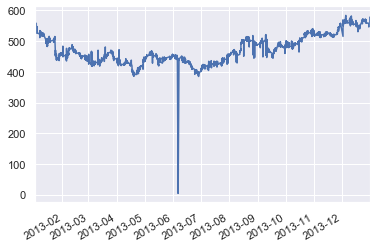

In [10]:
df['AvgPriceAAPL'].plot()

In [11]:
remove = df.loc['2013-06-05':'2013-06-06']
df = df.drop(remove.index)

In [12]:
df['AvgPriceAAPL'] = (df['OFR']+df['BID'])/2
df["RetAAPL0"]=df['AvgPriceAAPL'].pct_change()*100
for i in range (5):
    df["RetAAPL"+str(i+1)]=df["RetAAPL0"].shift(-i-1)
df.shape

(97405, 21)

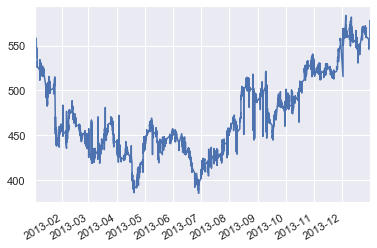

In [13]:
df.dropna(how='any', inplace=True)
df['AvgPriceAAPL'].plot()

In [14]:
start_date_train = '2013-01-02'
end_date_train = '2013-01-31'
start_date_test = '2013-02-01'
end_date_test = '2013-02-28'

In [15]:
Xtrain = df.loc[start_date_train:end_date_train,'RetAAPL0':'RetAAPL4'].values
ytrain = (df.loc[start_date_train:end_date_train,'RetAAPL5'].values >0 ).astype(int)

In [16]:
Xtest=df.loc[start_date_test:end_date_test,'RetAAPL0':'RetAAPL4'].values
ytest=(df.loc[start_date_test:end_date_test,'RetAAPL5'].values >0 ).astype(int)
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(Xtrain, ytrain)
y_model_NB = model.predict(Xtest)

In [17]:
from sklearn.metrics import accuracy_score
accuracy_score(y_model_NB, ytest)
# This model cannot be used in actual trading

0.5030286714228025

In [18]:
from sklearn.svm import SVC
model0 = SVC(kernel='rbf', C=10, gamma='auto')

In [19]:
model0.fit(Xtrain, ytrain)
y_model_SVC_old = model0.predict(Xtest)
accuracy_score(ytest, y_model_SVC_old)
# In this case, SVM have a quite good performance 

0.5819087360344596

In [20]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [1, 5, 10, 50]}
grid = GridSearchCV(model0, param_grid,cv = 5)
grid.fit(Xtrain, ytrain)
print(grid.best_params_)

{'C': 10}


In [21]:
model1 = SVC(kernel='rbf', C=10, gamma='auto')
model1.fit(Xtrain, ytrain)
y_model_SVC = model1.predict(Xtest)
accuracy_score(ytest, y_model_SVC)

0.5819087360344596

In [22]:
from sklearn.ensemble import RandomForestClassifier
model2 = RandomForestClassifier(n_estimators=100,random_state=0)
model2.fit(Xtrain, ytrain)
y_model_RF = model2.predict(Xtest)
accuracy_score(ytest, y_model_RF)

0.5485260465742361

In [23]:
RetNB = (y_model_NB*df.loc[start_date_test:end_date_test,'RetAAPL5'].values-(1-y_model_NB)*df.loc[start_date_test:end_date_test,'RetAAPL5'].values)
CsRetNB = (1+0.01*RetNB).cumprod() # cumulative returns
RetNB

array([-0.00766158,  0.03940542,  0.13030814, ..., -0.04471246,
       -0.02752767,  0.04474478])

In [24]:
RetSVC = (y_model_SVC*df.loc[start_date_test:end_date_test,'RetAAPL5'].values-(1-y_model_SVC)*df.loc[start_date_test:end_date_test,'RetAAPL5'].values)
CsRetSVC = (1+0.01*RetSVC).cumprod() # cumulative returns

In [25]:
RetRF = (y_model_RF*df.loc[start_date_test:end_date_test,'RetAAPL5'].values-(1-y_model_RF)*df.loc[start_date_test:end_date_test,'RetAAPL5'].values)
CsRetRF = (1+0.01*RetRF).cumprod() # cumulative returns

In [26]:
Return=pd.DataFrame()

In [27]:
Return["CsRetNB"]=CsRetNB
Return["CsRetSVC"]=CsRetSVC
Return["CsRetRF"]=CsRetRF
Return

,CsRetNB,CsRetSVC,CsRetRF
0,0.999923,0.999923,0.999923
1,1.000317,1.000317,0.999529
2,1.001621,0.999014,0.998227
3,1.002214,0.998422,0.998818
4,1.003588,0.999792,1.000188
...,...,...,...
7424,1.027353,6.071110,3.204766
7425,1.030792,6.050785,3.194037
7426,1.030331,6.048079,3.192608
7427,1.030048,6.046414,3.191730


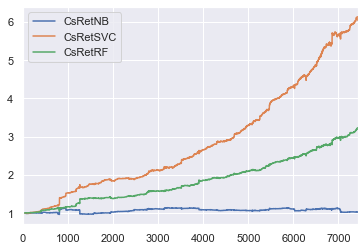

In [28]:
Return.plot()

In [29]:
XtrainNEW=df.loc[start_date_train:end_date_train,'RetAAPL0':'BAImb']
del XtrainNEW["RetAAPL5"]
XtestNEW=df.loc[start_date_test:end_date_test,'RetAAPL0':'BAImb']
del XtestNEW["RetAAPL5"]
XtrainNEW=XtrainNEW.values
XtestNEW=XtestNEW.values

In [30]:
model3 = GaussianNB()
model3.fit(XtrainNEW, ytrain)
y_model_NB_new = model3.predict(XtestNEW)
accuracy_score(y_model_NB_new, ytest)

0.5031632790415937

In [31]:
model4 = SVC(kernel='rbf', C=50, gamma='auto')
model4.fit(XtrainNEW, ytrain)
y_model_SVC_new = model4.predict(XtestNEW)
accuracy_score(ytest, y_model_SVC_new)

0.5513528065688518

In [32]:
model5 = RandomForestClassifier(n_estimators=100,random_state=0)
model5.fit(XtrainNEW, ytrain)
y_model_RF_new= model5.predict(XtestNEW)
accuracy_score(y_model_RF_new,ytest)

0.5500067303809396

In [33]:
RetNB_new = (y_model_NB_new*df.loc[start_date_test:end_date_test,'RetAAPL5'].values-(1-y_model_NB)*df.loc[start_date_test:end_date_test,'RetAAPL5'].values)
CsRetNB_new = (1+0.01*RetNB_new).cumprod() # cumulative returns

In [34]:
RetSVC_new = (y_model_SVC_new*df.loc[start_date_test:end_date_test,'RetAAPL5'].values-(1-y_model_SVC)*df.loc[start_date_test:end_date_test,'RetAAPL5'].values)
CsRetSVC_new = (1+0.01*RetSVC_new).cumprod() # cumulative returns

In [35]:
RetRF_new = (y_model_RF_new*df.loc[start_date_test:end_date_test,'RetAAPL5'].values-(1-y_model_RF)*df.loc[start_date_test:end_date_test,'RetAAPL5'].values)
CsRetRF_new = (1+0.01*RetRF_new).cumprod() # cumulative returns

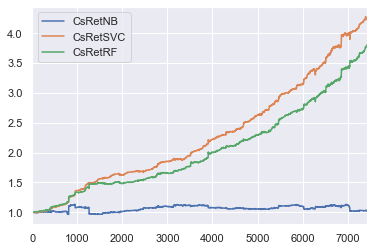

In [36]:
Return1=pd.DataFrame()
Return1["CsRetNB"]=CsRetNB_new
Return1["CsRetSVC"]=CsRetSVC_new
Return1["CsRetRF"]=CsRetRF_new
Return1.plot()

In [37]:
Return1
# Providing more information does not necessarily improve the result of a tradingv strategy

,CsRetNB,CsRetSVC,CsRetRF
0,0.999923,0.999923,0.999923
1,1.000317,0.999923,0.999529
2,1.001621,0.998620,0.998227
3,1.002214,0.998029,0.998227
4,1.003588,0.999398,0.999596
...,...,...,...
7424,1.023825,4.245465,3.802057
7425,1.027253,4.231251,3.789328
7426,1.026794,4.229359,3.787634
7427,1.026511,4.228195,3.786591


In [38]:
RetNB = (y_model_NB*df.loc[start_date_test:end_date_test,'RetAAPL5'].values-(1-y_model_NB)*df.loc[start_date_test:end_date_test,'RetAAPL5'].values)
RetNBcost = RetNB - df.loc[start_date_test:end_date_test,'BASprd'].values
CsRetNBcost = (1+0.01*RetNBcost).cumprod() # cumulative returns
RetSVC = (y_model_SVC*df.loc[start_date_test:end_date_test,'RetAAPL5'].values-(1-y_model_SVC)*df.loc[start_date_test:end_date_test,'RetAAPL5'].values)
RetSVCcost = RetSVC - df.loc[start_date_test:end_date_test,'BASprd'].values
CsRetSVCcost = (1+0.01*RetSVCcost).cumprod() # cumulative returns
RetRF = (y_model_RF*df.loc[start_date_test:end_date_test,'RetAAPL5'].values-(1-y_model_RF)*df.loc[start_date_test:end_date_test,'RetAAPL5'].values)
RetRFcost = RetRF - df.loc[start_date_test:end_date_test,'BASprd'].values
CsRetRFcost = (1+0.01*RetRFcost).cumprod() # cumulative returns

In [39]:
Return2=pd.DataFrame()
Return2["CsRetNB_cost"]=CsRetNBcost
Return2["CsRetSVC_cost"]=CsRetSVCcost
Return2["CsRetRF_cost"]=CsRetRFcost
Return2


,CsRetNB_cost,CsRetSVC_cost,CsRetRF_cost
0,0.999694,0.999694,0.999694
1,0.999750,0.999750,0.998962
2,0.946486,0.943881,0.943137
3,0.946757,0.943033,0.943407
4,0.947009,0.943284,0.943658
...,...,...,...
7424,0.009867,0.058363,0.030792
7425,0.009900,0.058165,0.030688
7426,0.009894,0.058134,0.030672
7427,0.009871,0.057995,0.030598


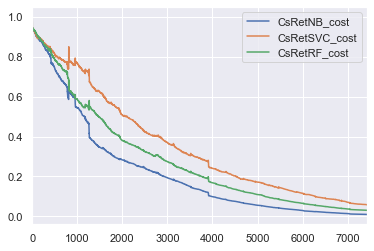

In [40]:
Return2.plot()
# None of the three methods can give a positive return taken in consideration of trading cost.

In [41]:
RetNB = (y_model_NB_new*df.loc[start_date_test:end_date_test,'RetAAPL5'].values-(1-y_model_NB_new)*df.loc[start_date_test:end_date_test,'RetAAPL5'].values)
RetNBcost = RetNB - df.loc[start_date_test:end_date_test,'BASprd'].values
CsRetNBcost = (1+0.01*RetNBcost).cumprod() # cumulative returns
RetSVC = (y_model_SVC_new*df.loc[start_date_test:end_date_test,'RetAAPL5'].values-(1-y_model_SVC_new)*df.loc[start_date_test:end_date_test,'RetAAPL5'].values)
RetSVCcost = RetSVC - df.loc[start_date_test:end_date_test,'BASprd'].values
CsRetSVCcost = (1+0.01*RetSVCcost).cumprod() # cumulative returns
RetRF = (y_model_RF_new*df.loc[start_date_test:end_date_test,'RetAAPL5'].values-(1-y_model_RF_new)*df.loc[start_date_test:end_date_test,'RetAAPL5'].values)
RetRFcost = RetRF - df.loc[start_date_test:end_date_test,'BASprd'].values
CsRetRFcost = (1+0.01*RetRFcost).cumprod() # cumulative returns

In [42]:
Return3=pd.DataFrame()
Return3["CsRetNB_cost"]=CsRetNBcost
Return3["CsRetSVC_cost"]=CsRetSVCcost
Return3["CsRetRF_cost"]=CsRetRFcost
Return3

,CsRetNB_cost,CsRetSVC_cost,CsRetRF_cost
0,0.999694,0.999694,0.999694
1,0.999750,0.998962,0.998962
2,0.946486,0.943137,0.943137
3,0.946757,0.942290,0.942290
4,0.947009,0.942541,0.942541
...,...,...,...
7424,0.009799,0.028151,0.042844
7425,0.009832,0.028056,0.042699
7426,0.009826,0.028041,0.042677
7427,0.009803,0.027974,0.042574


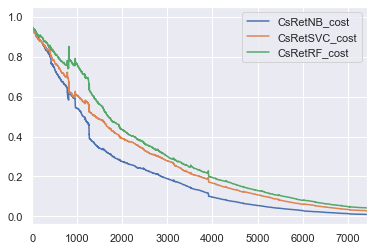

In [43]:
Return3.plot()
# None of the three methods can give a positive return taken in consideration of trading cost.